# Modeling for emerging start-ups in India

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Loading data and getting it ready for modeling

In [2]:
df = pd.read_excel(r"C:\Users\ptlon\OneDrive\Desktop\output - Copy.xlsx")  


In [3]:
df.shape

(290, 9)

In [4]:
df.head(3)

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank
0,22500,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,5533,2
1,25000,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,5533,2
2,30000,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,5533,2


In [5]:
df.tail(3)

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank
287,1350000,MobieFit,Healthcare,Health and fitness based mobile App,Goa,NB Ventures MediAssist,Seed/Angel Funding,7045,1
288,15500000,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,3433,5
289,3584000,Vogo Automotive Pvt. Ltd.,Transportation,Dockless Scooter Rental Company,Karnataka,Alteria Capital,Debt Funding,3139,7


In [6]:
df.isnull().sum()


Amount (In USD)    0
Startup Name       0
Industry           0
Sub-Vertical       0
State              0
Investors’ Name    4
Investment Type    0
2017               0
Rank               0
dtype: int64

In [7]:
df.dropna()

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank
0,22500,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,5533,2
1,25000,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,5533,2
2,30000,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,5533,2
3,30000,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,5533,2
4,30000,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,5533,2
...,...,...,...,...,...,...,...,...,...
285,1000000,HandyTrain,Technology,Mobile Learning Management Platform,Goa,NB Ventures,Private Equity,7045,1
286,1000000,HandyTrain,Consumer Internet,Mobile App for SAAS based Training,Goa,Silver Range Investments Lumina Datamatics Shu...,Private Equity,7045,1
287,1350000,MobieFit,Healthcare,Health and fitness based mobile App,Goa,NB Ventures MediAssist,Seed/Angel Funding,7045,1
288,15500000,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,3433,5


In [8]:
df.isnull().sum()

Amount (In USD)    0
Startup Name       0
Industry           0
Sub-Vertical       0
State              0
Investors’ Name    4
Investment Type    0
2017               0
Rank               0
dtype: int64

In [9]:
df.columns

Index(['Amount (In USD)', 'Startup Name', 'Industry', 'Sub-Vertical', 'State',
       'Investors’ Name', 'Investment Type', '2017', 'Rank'],
      dtype='object')

In [10]:
df.drop_duplicates(inplace = True)
df.shape

(289, 9)

In [11]:
df.sample(5)

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank
5,37000,Styledotme,Consumer Internet,Mobile Fashion App,Delhi,Indian Angel Network,Seed Funding,5533,2
178,2000000,Heads Up For Tails,ECommerce,Online Pet Products Store,Delhi,Undisclosed Investors,Private Equity,5533,2
9,50000,Curie Labs,Technology,Energy Analytics startup,Delhi,Satoshi Studios,Seed Funding,5533,2
99,500000,Veqta,Consumer Internet,On Demand Digital Sports Network,Delhi,Chatsworth Management ITW Digital,Seed Funding,5533,2
48,155000,IOTrek,Technology,IoT Platform for Bus,Delhi,Undisclosed Investor,Seed Funding,5533,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 289
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Amount (In USD)  289 non-null    int64 
 1   Startup Name     289 non-null    object
 2   Industry         289 non-null    object
 3   Sub-Vertical     289 non-null    object
 4   State            289 non-null    object
 5   Investors’ Name  285 non-null    object
 6   Investment Type  289 non-null    object
 7   2017             289 non-null    int64 
 8   Rank             289 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 22.6+ KB


In [13]:
df.set_index('Investment Type')

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,2017,Rank
Investment Type,,,,,,,,
Seed Funding,22500,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,5533,2
Seed Funding,25000,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,5533,2
Seed Funding,30000,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,5533,2
Seed Funding,30000,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,5533,2
Seed Funding,30000,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,5533,2
...,...,...,...,...,...,...,...,...
Private Equity,1000000,HandyTrain,Technology,Mobile Learning Management Platform,Goa,NB Ventures,7045,1
Private Equity,1000000,HandyTrain,Consumer Internet,Mobile App for SAAS based Training,Goa,Silver Range Investments Lumina Datamatics Shu...,7045,1
Seed/Angel Funding,1350000,MobieFit,Healthcare,Health and fitness based mobile App,Goa,NB Ventures MediAssist,7045,1


In [14]:
### exploring target
df['Amount (In USD)'].describe()

count    2.890000e+02
mean     1.177625e+07
std      5.494577e+07
min      2.250000e+04
25%      2.500000e+05
50%      1.000000e+06
75%      5.000000e+06
max      6.800000e+08
Name: Amount (In USD), dtype: float64

In [15]:
#making it easier to analyze
df['Amount (In USD)'].unique()

array([    22500,     25000,     30000,     37000,     40000,     45000,
           46140,     50000,     70000,     77000,     80000,     89000,
          100000,    104000,    110000,    120000,    123000,    133000,
          141000,    145000,    147000,    148000,    150000,    155000,
          156000,    180000,    187000,    200000,    205000,    220000,
          240000,    246000,    250000,    293000,    295000,    300000,
          324000,    330000,    336000,    350000,    375000,    376000,
          441000,    443000,    445000,    450000,    455000,    475000,
          500000,    570000,    600000,    620000,    650000,    700000,
          740000,    750000,    772500,    872000,   1000000,   1100000,
         1300000,   1400000,   1500000,   1600000,   1700000,   1750000,
         1800000,   2000000,   2200000,   2250000,   2300000,   2400000,
         2700000,   3000000,   3100000,   3500000,   3591375,   3600000,
         4000000,   4400000,   5000000,   6000000, 

In [16]:
df.head()

,Amount (In USD),Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,2017,Rank
0,22500,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,5533,2
1,25000,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,5533,2
2,30000,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,5533,2
3,30000,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,5533,2
4,30000,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,5533,2


In [17]:
df.info('Amount (In USD)')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 289
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Amount (In USD)  289 non-null    int64 
 1   Startup Name     289 non-null    object
 2   Industry         289 non-null    object
 3   Sub-Vertical     289 non-null    object
 4   State            289 non-null    object
 5   Investors’ Name  285 non-null    object
 6   Investment Type  289 non-null    object
 7   2017             289 non-null    int64 
 8   Rank             289 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 22.6+ KB


In [18]:
### All correlations between 'Amount (In USD)' and all other features
print(df.corr()['Amount (In USD)'].abs().sort_values(ascending=False))

Amount (In USD)    1.000000
2017               0.012312
Rank               0.007511
Name: Amount (In USD), dtype: float64


Highest correlation between Investment type and Amount in USD.

# EDA: Exploratory Data Analysis

1000000    32
100000     15
500000     14
2000000    12
5000000    12
           ..
441000      1
376000      1
375000      1
336000      1
3584000     1
Name: Amount (In USD), Length: 123, dtype: int64


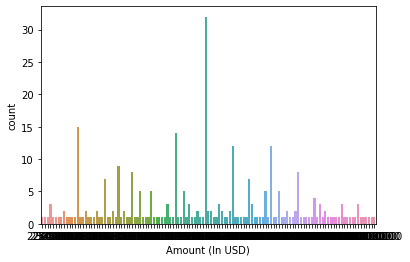

In [19]:
y = df['Amount (In USD)']
sns.countplot(y)
price_temp = df['Amount (In USD)'].value_counts()
print(price_temp)

[Text(0.5, 0, 'Amount (In USD)'), Text(0, 0.5, 'Amount in USD in MM')]

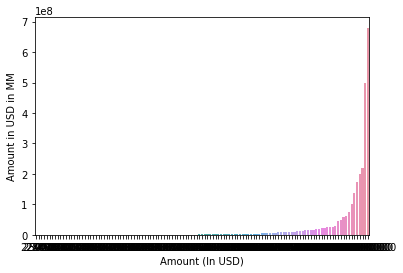

In [20]:
ax = sns.barplot(df['Amount (In USD)'],y)
ax.set(xlabel='Amount (In USD)', ylabel='Amount in USD in MM')

[Text(0.5, 0, 'Rank'), Text(0, 0.5, 'Rank in MM $')]

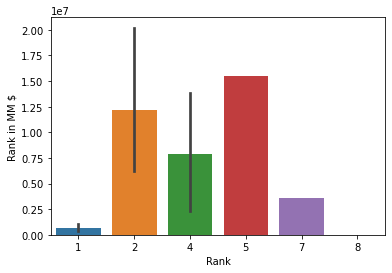

In [21]:
ax=sns.barplot(df['Rank'],y)
ax.set(xlabel='Rank', ylabel='Rank in MM $')

In [22]:
### Explore Rank
df['Rank'].unique()

array([2, 8, 4, 1, 5, 7], dtype=int64)

In [23]:
### Industry
df['Industry'].unique()

array(['Technology', 'Consumer Internet', 'ECommerce', 'Ed-Tech',
       'Food Ordering & Delivery App',
       'Travel Destination Discovery platform',
       'on-Demand Washing & Dry-Cleaning',
       'Gym & Fitness Studios Subscription platform',
       'Online Car Rental Affiliates',
       'Online Food ordering & Delivery platform',
       'On Demand Laundry Services App', 'Video Streaming', 'Compliance',
       'Others', 'Online Medical Diagnostic',
       'Premium Apparel shopping portal', 'Internet of Things platform',
       'Online Diagnostic Tests Marketplace', 'Device Repair Svcs',
       'Cab search Comparison & Booking platform',
       'Virtual Reality activity based learning platform',
       'Study Material Marketplace', 'Exam Preparation Platform',
       'Smart Safety Wearable Devices',
       'Hotel Aggregator & booking platform', 'mobile social network',
       'Clean-tech', 'Private Label Apparel sales',
       'Healthy Food Online Community', 'Real Estate Broker 

[Text(0.5, 0, 'Industry'), Text(0, 0.5, 'Industry visualization')]

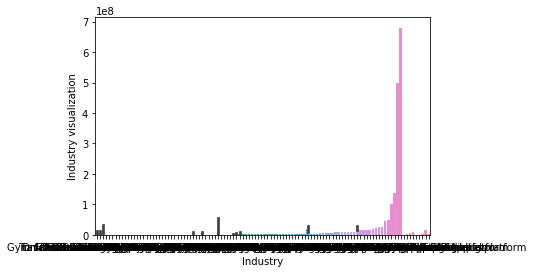

In [24]:
ax = sns.barplot(df['Industry'], y)
ax.set(xlabel='Industry', ylabel = 'Industry visualization')

In [25]:
### State
df['State'].unique()

array(['Delhi', 'Kerala', 'Chandigarh', 'Goa', 'Haryana', 'Karnataka'],
      dtype=object)

[Text(0.5, 0, 'State'), Text(0, 0.5, 'State visualization')]

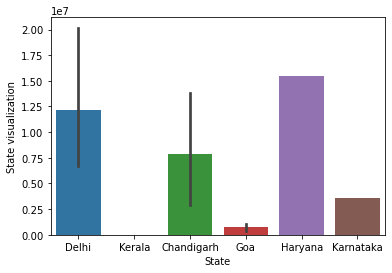

In [26]:
ax = sns.barplot(df['State'],y)
ax.set(xlabel='State', ylabel='State visualization')

[Text(0.5, 0, 'Startup Name'), Text(0, 0.5, 'Startup Name Viz')]

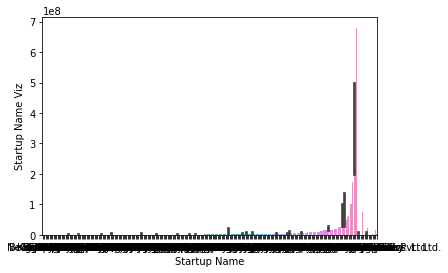

In [27]:
ax = sns.barplot(df['Startup Name'],y)
ax.set(xlabel='Startup Name', ylabel='Startup Name Viz')

HOT Fix for Train, Test, Split

In [28]:
df.index = range(289)

In [29]:
df = df.drop('Startup Name', axis =1)


In [30]:
df = df.drop('Sub-Vertical', axis=1)

In [31]:
df = df.drop('Industry', axis=1)

In [32]:
df = df.drop('State', axis=1)

In [33]:
df = df.drop('Investors’ Name', axis=1)

In [34]:
df = df.drop('Investment Type', axis=1)

In [35]:
df.head()

,Amount (In USD),2017,Rank
0,22500,5533,2
1,25000,5533,2
2,30000,5533,2
3,30000,5533,2
4,30000,5533,2


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
predictors = df.drop("Amount (In USD)",axis=1)
price = df['Amount (In USD)']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(predictors,price,test_size=0.20,random_state=0)

X_train.shape

(231, 2)

In [46]:
X_test.shape

(58, 2)

In [47]:
X_train.shape

(231, 2)

In [48]:
y_train.shape

(231,)

In [49]:
y_test.shape

(58,)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Amount (In USD)  289 non-null    int64
 1   2017             289 non-null    int64
 2   Rank             289 non-null    int64
dtypes: int64(3)
memory usage: 6.9 KB


In [51]:
### V. Model Fitting
from sklearn.metrics import accuracy_score
### from sklearn.metrics import accuracy_score accuracy_score(ytest, y_model)

In [52]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
### The accuracy score achieved using Logistic Regression is: 0.86%


The accuracy score achieved using Logistic Regression is: 8.62 %


In [54]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)
y_pred_svm.shape
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)
print("The accuracy score achieved using Linear Support Vector Machines is: "+str(score_svm)+" %")
### The accuracy score achieved using Linear SVM is: 2.44%

The accuracy score achieved using Linear Support Vector Machines is: 8.62 %


In [55]:
### Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
y_pred_nb.shape
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
### The accuracy score achieved using Naive Bayes is: 0.07%

The accuracy score achieved using Naive Bayes is: 5.17 %


In [56]:
### K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn.shape
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
### The accuracy score achieved using KNN is: 0.51%

The accuracy score achieved using KNN is: 8.62 %


In [57]:
### Decision Tree
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x        
#print(max_accuracy)
#print(best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(y_pred_dt.shape)
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
### The accuracy score achieved using Decision Tree is: 2.44

(58,)
The accuracy score achieved using Decision Tree is: 5.17 %


In [58]:
### XGBoost
### import xgboost as xgb
### xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
### xgb_model.fit(X_train, y_train)
### y_pred_xgb = xgb_model.predict(X_test)
### print(y_pred_xgb.shape)
### score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
### print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
### The accuracy score achieved using XGBoost is: 

In [62]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf.shape
print(y_pred_rf.shape)
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")
### The accuracy score achieved using Decision Tree is:

(58,)
The accuracy score achieved using Random Forest is: 8.62 %


In [63]:
### Neural Network
### from keras.models import Sequential
### from keras.layers import Dense
### Using TensorFlow backend.
### https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting
### model = Sequential()
### model.add(Dense(11,activation='relu',input_dim=13))
### model.add(Dense(1,activation='sigmoid'))
### model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
### model.fit(X_train,y_train,epochs=300)
### y_pred_nn = model.predict(X_test)
### print(y_pred_nn.shape)
### rounded = [round(x[0]) for x in y_pred_nn]
### print(y_pred_nn = rounded)
### score_nn = round(accuracy_score(y_pred_nn,y_test)*100,2)
### print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")
### Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.
### The accuracy score achieved using Neural Network is: 
### ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensor

Output final score

The accuracy score achieved using Logistic Regression is: 8.62 %
The accuracy score achieved using Naive Bayes is: 5.17 %
The accuracy score achieved using Support Vector Machines is: 8.62 %
The accuracy score achieved using K-Nearest Neighbors is: 8.62 %
The accuracy score achieved using Decision Tree is: 5.17 %
The accuracy score achieved using Random Forest is: 8.62 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

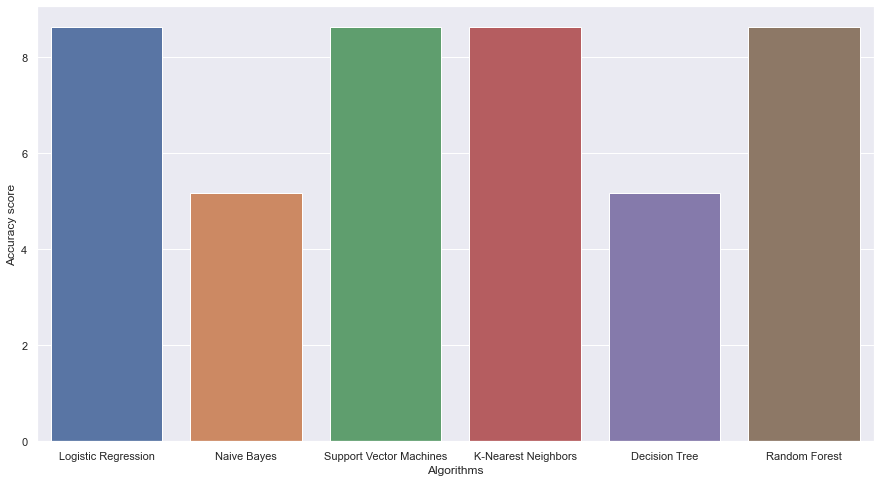

In [61]:
scores = [score_lr, score_nb, score_svm, score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machines","K-Nearest Neighbors","Decision Tree","Random Forest"]    
### print(scores)
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)